## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

The data: We will use the sklearn built-in dataset on handwritten digits.

This task is an example where k-NN works surprisingly well.

Pictures here are 8x8 matrices (intensity of white color for each pixel). Then each such matrix is "unfolded" into a vector of length 64, and we obtain a feature description of an object.

Let's draw some handwritten digits. We see that they are distinguishable.

In [2]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

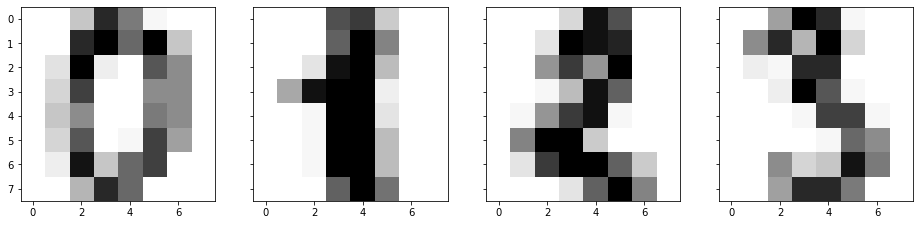

In [3]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys")

The other columns indicate the amount of a protein present in that brain tissue sample.

## Pre-processing

Let's select 70% of the dataset for training (X_train, y_train) and 30% for testing (X_test, y_test). Using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =17)

Let’s train a decision tree and k-NN on the training dataset.

**Question**: Why is scaling the data not necessary for this problem? In general, is it a best practice to scale data for Decision Trees? What about for k-NN?

## KNN vs. Decision Trees

Define the Classifiers: [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [5]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

Fit the classifiers to the training data:

In [6]:
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Now let’s make predictions on our test set.

In [7]:
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)

And, find the accuracy scores on test set.

In [8]:
tree_score = accuracy_score(y_test, tree_pred)
knn_score = accuracy_score(y_test, knn_pred)

Print the accuracy scores:

In [9]:
print("Decision Tree Score ="+str(tree_score))
print("knn score = "+ str(knn_score) )

Decision Tree Score =0.6666666666666666
knn score = 0.9740740740740741


## Tuning Hyperparameters

Now let’s tune our model parameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (cross-validation).

### For Decision Trees

In [10]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
     

Let's see the best parameters combination and the corresponding accuracy from cross-validation:

In [11]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

### For KNN

In [12]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10]
knn_params = {
    "n_neighbors": n_neighbors
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

Let's see the best parameters combination and the corresponding accuracy from cross-validation for KNN.

In [13]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 1}, 0.9864858028204642)

**Question**: Why does KNN perform better for this dataset than Decision Trees?

Let's see how the CV score changes with k.

Text(0, 0.5, 'Mean CV Score')

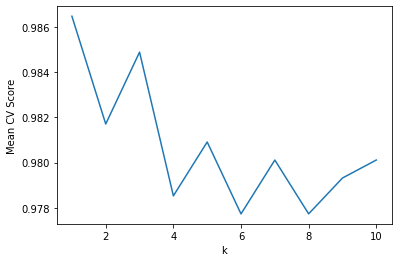

In [14]:
plt.plot(n_neighbors,knn_grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Mean CV Score')

**Question**: What happens when k is a high number?

## Comparing the Confusion Matrix

See the associated confusion matrices.

In [15]:
from sklearn.metrics import confusion_matrix

def visualize_confusion_matrix(test, pred, score):
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

### For Decision Trees

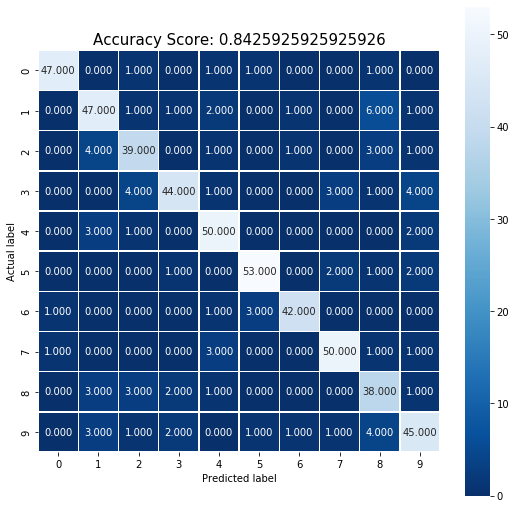

In [16]:
dt_y_pred = tree_grid.predict(X_test)
dt_score = tree_grid.score(X_test, y_test)
visualize_confusion_matrix(y_test, dt_y_pred, dt_score)

### For KNN

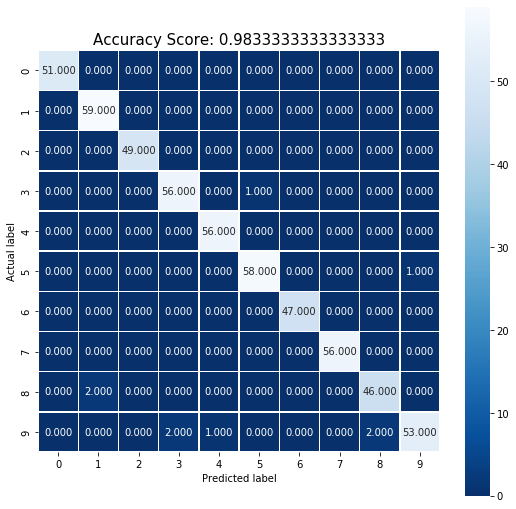

In [21]:
knn_y_pred = knn_grid.best_estimator_.predict(X_test)
knn_score = knn_grid.best_estimator_.score(X_test, y_test)
visualize_confusion_matrix(y_test, knn_y_pred, knn_score)

**Question**: In confusion matrix, why is it good to have higher values in the diagonal and lower values in the off-diagonals?